In [2]:
# To Stop GPUs working

In [3]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

# Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import PIL # pillow - image processing
import tensorflow as tf
from PIL import Image
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib
import matplotlib.pyplot as plt
from keras.optimizers import Adam

tf.random.set_seed(123)

Using TensorFlow backend.


In [5]:
import os
#os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\2nd_dataset_image\Cropped_1Channel_Mask")
#os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')
print(os.path.dirname(os.getcwd()))

C:\Users\said_\Google Drive\THE CITY COLLEGE OF NEW YORK\Ph.D.Classes\Spring21\Neural Networks\Project\Repo_CCNY_4\final-project-landandbuildingsatimg-ccny\notebooks


In [6]:
import sys
sys.path
sys.path.append(r'../../src/')

In [7]:
from visualization import visualize

In [8]:
from models.keras_segmentation.models.unet import vgg_unet
#from models.image_segmentation.keras_segmentation.models.unet import resnet50_unet
#from models.image_segmentation.keras_segmentation.models.segnet import vgg_segnet
#from models.image_segmentation.keras_segmentation.models.segnet import resnet50_segnet

Segmentation Models: using `keras` framework.


# PLEASE READ LINE BELLOW

### Before use this notebook, please create a folder in githubfolder/models/Save_Models or run the following commented line

In [9]:
folder_name = 'Save_True_Weights'
#os.mkdir(r'../../models/'f'{folder_name}')

# Reading Images and Masks

In [10]:
reading_images = (glob.glob(r'../../data/processed/Cropped_same_name/test/Images/*.png'))
reading_masks = (glob.glob(r'../../data/processed/Cropped_same_name/test/Masks/*.png'))
# reading_weights = (glob.glob(r'../../data/processed/Cropped_same_name/train/Sample_Weights/*.npy'))
img_num = 9

In [11]:
img = PIL.Image.open(reading_images[img_num], 'r')
mask = PIL.Image.open(reading_masks[img_num], 'r')

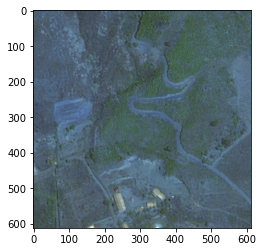

In [12]:
plt.imshow(np.asarray(img))

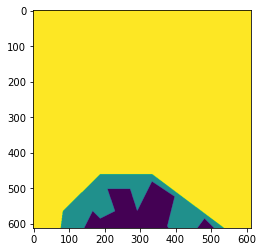

In [13]:
plt.imshow(np.asarray(mask))

# GPU

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# History Function

In [15]:
def plot_history(history):
       
    acc = history.history['iou_score']
    val_acc = history.history['val_iou_score']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

## Ploting the class labels

In [16]:
labels = pd.read_csv('../../data/processed/Cropped_same_name/class_dict.csv')
classes = list(labels['name'])
classes

['unknown',
 'urban_land',
 'agriculture_land',
 'rangeland',
 'forest_land',
 'water',
 'barren_land']

In [17]:
labels = classes
col_dict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 
           4: 'yellow', 5: 'purple', 6: 'grey', }
col_dict

{0: 'blue',
 1: 'red',
 2: 'orange',
 3: 'green',
 4: 'yellow',
 5: 'purple',
 6: 'grey'}

# Paths

In [18]:
weight_path= ['Model_Best_Weights_vgg_unet.hdf5',
             'Model_Best_Weights_resnet50_unet.hdf5',
             'Model_Best_Weights_vgg_segnet.hdf5',
             'Model_Best_Weights_resnet50_segnet.hdf5']
save_path= ['Model_Save_Model_vgg_unet.h5',
             'Model_Save_Model_resnet50_unet.h5',
             'Model_Save_Model_vgg_segnet.h5',
             'Model_Save_Model_resnet50_segnet.h5']
image_path= ['Model_vgg_unet.png',
             'Model_resnet50_unet.png',
             'Model_vgg_segnet.png',
             'Model_resnet50_segnet.png']

# 0. VGG_UNET

In [19]:
i = 0

In [20]:
callbacks = [
    ModelCheckpoint(monitor='val_iou_score',
                filepath= '../../models/'f'{folder_name}''/' + weight_path[i],
                        save_best_only=True,
                        verbose=1, mode = 'max'), 
    EarlyStopping(monitor='val_iou_score',patience=10,
                           restore_best_weights=True,
                           mode='max'),
    ReduceLROnPlateau(monitor='val_iou_score', factor=0.5,
                              patience=3, min_lr=0.00001)
]

In [21]:
model = vgg_unet(n_classes=7 , input_height=512, input_width=512)

In [22]:
from datetime import datetime
start = datetime.now()
total_loss, optim, metrics,  train_gen,  steps_per_epoch, val_gen, val_steps_per_epoch, epochs, callbacks, gen_use_multiprocessing, initial_epoch = model.train(
    input_height = 612,
    input_width = 612,
    learn_rate=0.0001,
    verify_dataset = False,
#     train_images =  "../../data/processed/Cropped_same_name/train/Images/",
#     train_annotations = "../../data/processed/Cropped_same_name/train/Masks/",
    train_images =  "../../data/processed/Cropped_same_name_/train/Images/",
    train_annotations = "../../data/processed/Cropped_same_name_/train/Masks/",
    validate= True,
    val_images =  "../../data/processed/Cropped_same_name_/val/Images/",
    val_annotations = "../../data/processed/Cropped_same_name_/val/Masks/",
#     val_images =  "../../data/processed/Cropped_same_name/val/Images/",
#     val_annotations = "../../data/processed/Cropped_same_name/val/Masks/",
    epochs=1, 
    callbacks = callbacks,
#     other_inputs_paths = ["D:/PhD Classes (Big_files)/Neural Networks/Neural Networks/Project/2nd_dataset_image/Cropped_same_name/train/Sample_Weights/"]
     other_inputs_paths = ["../../data/processed/Cropped_same_name_/Sample_Weights_/"]
)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))


Time Taken for testing: 0:00:00.004987


In [23]:
# # Create a MirroredStrategy.
# strategy = tf.distribute.MirroredStrategy()
# print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# # Open a strategy scope.
# with strategy.scope():
#   # Everything that creates variables should be under the strategy scope.
#   # In general this is only model construction & `compile()`.
#     model = vgg_unet(n_classes=7 , input_height=512, input_width=512)
#     #model.summary()
#     model.compile(loss=total_loss, optimizer= optim, metrics= metrics)

In [24]:
# model = vgg_unet(n_classes=7 , input_height=512, input_width=512)
#model.summary()
# optima = keras.optimizers.Adam(lr = 0.0001)
optima = Adam(lr=0.0001)
model.compile(loss=total_loss, optimizer= optima, metrics= metrics)

In [25]:
nn_model = model.fit(train_gen,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_gen,
                  validation_steps=val_steps_per_epoch,
                  epochs=epochs, callbacks=callbacks,
                  use_multiprocessing=gen_use_multiprocessing, initial_epoch=initial_epoch) #, sample_weight = sample_weight)

Epoch 1/1
512/512 [==============================] - 274s 535ms/step - loss: 0.5076 - iou_score: 0.3760 - f1-score: 0.5194 - val_loss: 0.4415 - val_iou_score: 0.4631 - val_f1-score: 0.6042

Epoch 00001: val_iou_score improved from -inf to 0.46313, saving model to ../../models/Save_True_Weights/Model_Best_Weights_vgg_unet.hdf5


## Saving the model

In [26]:
model.save('../../models/'f'{folder_name}''/' + save_path[i])

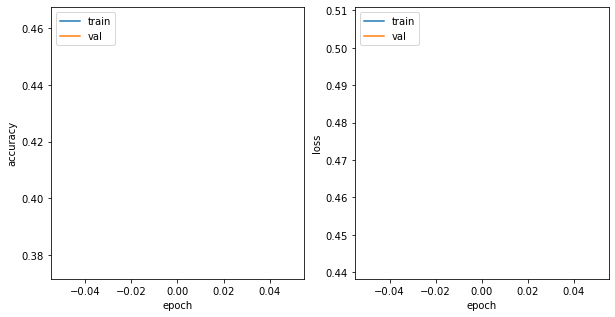

In [27]:
plot_history(nn_model)

In [28]:
out = model.predict_segmentation(
    inp= reading_images[img_num],
    out_fname= '../../models/'f'{folder_name}''/' + image_path[i]
)

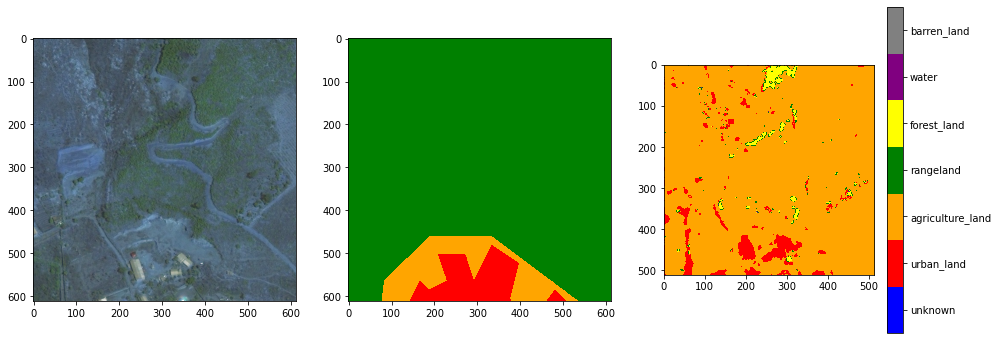

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].imshow(np.asarray(img))
axes[1] = visualize.plot_label(np.asarray(mask), labels,col_dict, axes[1], fig, colorbar = False)
axes[2] = visualize.plot_label(np.asarray(out), labels,col_dict, axes[2], fig, colorbar = True)